In [20]:
from kestrix.model import predict, train_model, compile_model
from kestrix.registry import load_model

In [21]:
model = load_model("2024-05-31T13:05:11.094612.keras")

Loading existing model.


/Users/tim/.pyenv/versions/3.10.6/envs/kestrix/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/Users/tim/.pyenv/versions/3.10.6/envs/kestrix/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [22]:
model = compile_model(model)

Compiling model.


In [46]:
from kestrix.preprocess import preprocess_new_image

In [47]:
new_data = preprocess_new_image(path="../data/kestrix/raw/DJI_20230504173742_0003_V.JPG")

Padding image.
Splitting into compartments.


In [48]:
from keras_cv import bounding_box

In [60]:
from kestrix.postprocess import convert_coordinates_to_full_image, blur_bounding_boxes
from kestrix.visualization import visualize_bounding_box

In [50]:
from kestrix.params import *

In [51]:
def visualize_detections(model, dataset):
    images = next(iter(dataset.take(1)))
    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=BOUNDING_BOX_FORMAT,
        y_pred=y_pred,
        scale=4,
        rows=2,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=CLASS_MAPPING,
    )


2/2 [==============================] - 6s 1s/step


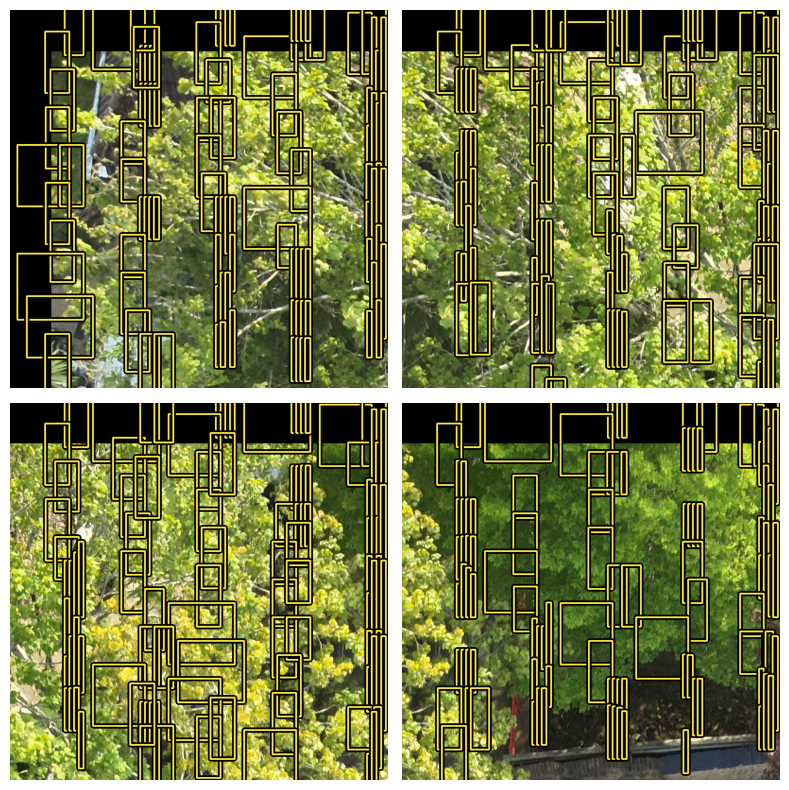

In [52]:
visualize_detections(model, new_data)

In [31]:
from keras_cv import visualization

In [54]:
images = next(iter(new_data.take(1)))
y_pred = model.predict(images)

2/2 [==============================] - 6s 2s/step


In [55]:
y_pred

{'boxes': array([[[ 348.      ,  -44.      ,  356.      ,   60.      ],
         [ 356.      ,  -44.      ,  364.      ,   60.      ],
         [ 364.      ,  -44.      ,  372.      ,   60.      ],
         ...,
         [ 500.      , -115.99999 ,  508.      ,   52.      ],
         [ 204.      ,  -36.      ,  244.      ,   68.      ],
         [ 209.77689 ,   28.      ,  252.      ,  131.68947 ]],
 
        [[ 348.      ,  -44.      ,  356.      ,   60.      ],
         [ 356.      ,  -44.      ,  364.      ,   60.      ],
         [ 364.      ,  -44.      ,  372.      ,   60.      ],
         ...,
         [ 244.      ,  -36.      ,  276.      ,   68.      ],
         [ 348.      ,  -12.      ,  380.      ,   92.      ],
         [ 372.      ,  -12.      ,  404.      ,   92.      ]],
 
        [[ 348.      ,  -44.      ,  356.00024 ,   60.      ],
         [ 356.      ,  -44.      ,  364.      ,   60.      ],
         [ 364.      ,  -44.      ,  372.      ,   60.      ],
         ...

In [62]:
new_boxes = convert_coordinates_to_full_image(prediction)
new_boxes
blur_bounding_boxes("../data/kestrix/raw/DJI_20230504173742_0003_V.JPG", new_boxes)

Error: Bounding box coordinates (278, -114, 286, -10) are outside the image dimensions.
Error: Bounding box coordinates (286, -114, 294, -10) are outside the image dimensions.
Error: Bounding box coordinates (294, -114, 302, -10) are outside the image dimensions.
Error: Bounding box coordinates (302, -114, 310, -10) are outside the image dimensions.
Error: Bounding box coordinates (22, -98, 54, 6) are outside the image dimensions.
Error: Bounding box coordinates (406, -90, 438, 14) are outside the image dimensions.
Error: Bounding box coordinates (430, -90, 462, 14) are outside the image dimensions.
Error: Bounding box coordinates (70, -74, 158, 30) are outside the image dimensions.
Error: Bounding box coordinates (502, -66, 542, 38) are outside the image dimensions.
Error: Bounding box coordinates (526, -122, 566, 38) are outside the image dimensions.
Error: Bounding box coordinates (245, -50, 286, 54) are outside the image dimensions.
Error: Bounding box coordinates (-10, -34, 30, 70

: 

In [34]:
new_boxes

,x_min,y_min,x_max,y_max
0,278.00000,-114.0,286.0,-10.0
1,286.00000,-114.0,294.0,-10.0
2,294.00000,-114.0,302.0,-10.0
3,302.00000,-114.0,310.0,-10.0
4,22.00000,-98.0,54.0,6.0
...,...,...,...,...
4795,3426.28896,2346.0,3466.0,2474.0
4796,3818.00000,2410.0,3858.0,2514.0
4797,3586.00000,2426.0,3618.0,2530.0
4798,3946.00000,2434.0,3986.0,2538.0
